In [1]:
import numpy as np
import pandas as pd

from aeon.visualisation import plot_critical_difference
from aeon.visualisation import plot_pairwise_scatter

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import MinMaxScaler

import json

In [2]:
mlp = pd.read_csv('results/[end] MLP.csv')
fcn = pd.read_csv('results/[end] FCN.csv')
convtran = pd.read_csv('results/[end] ConvTran.csv')
tsermamba = pd.read_csv('results/TSERMamba.csv')

In [3]:
mlp = mlp.sort_values(by='dataset').set_index('dataset')
fcn = fcn.sort_values(by='dataset').set_index('dataset')
convtran = convtran.sort_values(by='dataset').set_index('dataset')
tsermamba = tsermamba.sort_values(by='dataset').set_index('dataset')

metrics = pd.DataFrame({
    'mlp': mlp['rmse'],
    'fcn': fcn['rmse'],
    'convtran': convtran['rmse'],
    'tsermamba': tsermamba['rmse'],
})

metrics = metrics.dropna(subset=['tsermamba'])

metrics

,mlp,fcn,convtran,tsermamba
dataset,,,,
AppliancesEnergy,3.416436,2.829873,2.778814,3.541914
BIDMC32HR,13.443014,7.273788,4.585035,9.967628
BIDMC32RR,3.663970,4.072824,3.713405,4.956176
BIDMC32SpO2,4.689669,5.555124,5.184596,5.029221
BeijingPM10Quality,119.633397,117.574150,127.223239,116.608201
BeijingPM25Quality,87.844715,84.335811,94.716624,89.679407
BenzeneConcentration,4.234673,3.338947,3.564750,4.468293
Covid3Month,0.047392,0.060006,0.050733,0.043434
FloodModeling1,0.017775,0.015911,0.018034,0.021686


(<Figure size 600x230 with 1 Axes>, <Axes: >)

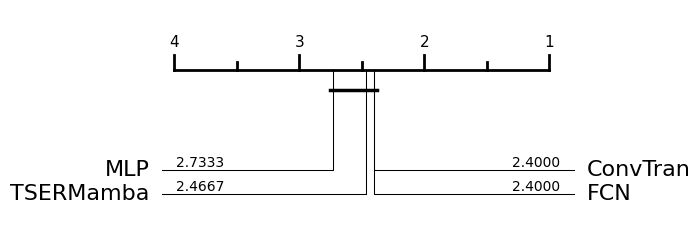

In [4]:
name = {'mlp':'MLP', 'fcn':'FCN', 'convtran':'ConvTran', 'tsermamba':'TSERMamba'}
metrics.columns = [name[col] for col in metrics.columns]

plot_critical_difference(
    metrics.values,
    metrics.columns.tolist(),
    test='nemenyi',
    lower_better=True,
    alpha=0.05
)   

In [5]:
metrics.rank(axis=1)['MLP'].value_counts().sort_index()

MLP
1.0    2
2.0    4
3.0    5
4.0    4
Name: count, dtype: int64

In [6]:
metrics.rank(axis=1)['FCN'].value_counts().sort_index()

FCN
1.0    4
2.0    4
3.0    4
4.0    3
Name: count, dtype: int64

In [7]:
metrics.rank(axis=1)['TSERMamba'].value_counts().sort_index()

TSERMamba
1.0    6
2.0    1
3.0    3
4.0    5
Name: count, dtype: int64

In [8]:
metrics.rank(axis=1)['ConvTran'].value_counts().sort_index()

ConvTran
1.0    3
2.0    6
3.0    3
4.0    3
Name: count, dtype: int64